In [11]:
import os
from numpy import pi, exp, real, imag, linspace
import numpy as np
import matplotlib.gridspec as gridspec
import mpmath as mp
import scipy.special as sp
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.sans-serif']=['STSong'] #用来正常显示中文标签 plt.rcParam
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#plt.rcParams['text.latex.unicode'] = True
hfont = {'fontname':'STIXGeneral'} #DejaVu Sans
import matplotlib.font_manager as fm

In [12]:
def makedir(dirName):
    if not os.path.exists(dirName):
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ")
    else:
        g = 0
        print("Directory " , dirName ,  " already exists")

In [13]:
gs = gridspec.GridSpec(1, 3,
#                        width_ratios=[1, 2],
#                        height_ratios=[4, 1]
                       )
def turn1():
    print('Lise of pictures')
    def mplot(ax, n, t, ymin, ymax):
        xT=plt.xticks()[0]
        xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
        r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
        ax.set_title(r'$n=$'+str(n)+', $t=$'+str(t))
        ax.set_title(r'$n=$'+str(n))
#         ax.title.set_position([.5, -0.35]) # 1.2
        ax.set_theta_zero_location('N')
        plt.xticks(xT, xL)
        ax.set_ylim(1.05 * ymin, 1.05 * ymax)
        ax.set_yticks([0])
def turn2():
    print('Single picture')
    def mplot(ax, n, t, ymin, ymax):
        xT=plt.xticks()[0]
        xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
        r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
        ax.set_title(r'$n=$'+str(n)+', $t=$'+str(t))
#           ax.set_title(r'$n=$'+str(n))
        ax.title.set_position([.5, -0.35]) # 1.2
        ax.set_theta_zero_location('N')
        plt.xticks(xT, xL)
        ax.set_ylim(1.05 * ymin, 1.05 * ymax)
        ax.set_yticks([0])

In [14]:
def mplot(ax, n, t, ymin, ymax):
    xT=plt.xticks()[0]
    xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
#     ax.set_title(r'$n=$'+str(n)+', $t=$'+str(t))
    ax.set_title(r'$n=$'+str(n))
    ax.title.set_position([.5, -0.35]) # 1.2
    ax.set_theta_zero_location('N')
    plt.xticks(xT, xL)
    ax.set_ylim(1.05 * ymin, 1.05 * ymax)
    ax.set_yticks([0])

In [15]:
nd = 1000
x = linspace(0, 2*pi, nd)
mo1 = linspace(0, 2*pi, nd)
mo2 = linspace(0, 2*pi, nd)
mo3 = linspace(0, 2*pi, nd)
n = [1,2,3]
def lplot(name, title, td):
    makedir('Img/'+str(name))
    for t in range(td):
        real1 = real(my(x,t,n[0]))
        imag1 = imag(my(x,t,n[0]))
        real2 = real(my(x,t,n[1]))
        imag2 = imag(my(x,t,n[1]))
        real3 = real(my(x,t,n[2]))
        imag3 = imag(my(x,t,n[2]))
        for i in range(nd):
            mo1[i] = real1[i]**2 + imag1[i]**2
            mo2[i] = real2[i]**2 + imag2[i]**2
            mo3[i] = real3[i]**2 + imag3[i]**2
        min1 = min(min(real1),min(imag1),min(mo1))
        min2 = min(min(real2),min(imag2),min(mo2))
        min3 = min(min(real3),min(imag3),min(mo3))
        max1 = max(max(real1),max(imag1),max(mo1))
        max2 = max(max(real2),max(imag2),max(mo2))
        max3 = max(max(real3),max(imag3),max(mo3))
        f = plt.figure()
        f.suptitle(title, fontsize=16,x = 0.5, y = 0.85)
        ax1 = plt.subplot(gs[0], projection='polar')
        mplot(ax1,n[0],t,min1,max1)
        ax1.plot(x,real1,':',lw=2)
        ax1.plot(x,imag1,'--',lw=2)
        ax1.plot(x,mo1,'-',lw=2)
        ax2 = plt.subplot(gs[1], projection='polar')
        mplot(ax2,n[1],t,min2,max2)
        ax2.plot(x,real2,':',lw=2)
        ax2.plot(x,imag2,'--',lw=2)
        ax2.plot(x,mo2,'-',lw=2)
        ax3 = plt.subplot(gs[2], projection='polar')
        mplot(ax3,n[2],t,min3,max3)
        ax3.plot(x,real3,':',lw=2)
        ax3.plot(x,imag3,'--',lw=2)
        ax3.plot(x,mo3,'-',lw=2)
        ax3.legend(["实部","虚部","模的平方"], loc='best', bbox_to_anchor=(0.7, 1.3, 0.5, 0.25), fontsize= 'x-small') #   fontsize= 'x-small'   loc = 'upper right'  bbox_to_anchor=(0.5,1.2)
        f.savefig('Img/' + str(name) + '/f-' + str(t) + '.pdf', bbox_inches='tight')

Directory  Img/Single  already exists


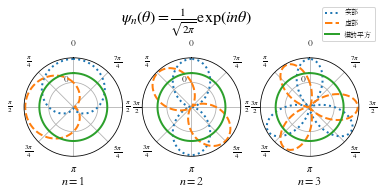

In [16]:
title = r'$ \psi_{n}(\theta)=\frac{1}{\sqrt{2 \pi}} \exp (i n \theta) $'
def my(x, t, n):
    return 1/np.sqrt(2*pi)*exp(n*1j*x)
lplot('Single', title, 1)

Directory  Img/Single  already exists


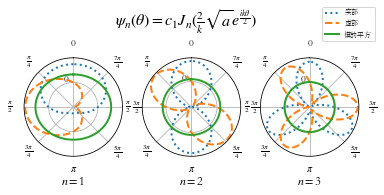

In [17]:
title = r'$ \psi_n (\theta)=c_1J_n(\frac{2}{k}\sqrt{a} e_{}^{\frac{ik\theta}{2}}) $'
def my(x, t, n):
    return sp.jv(n, exp(1j*x))
lplot('Single', title, 1)

In [18]:
def mplot(ax, n, t, ymin, ymax):
    xT=plt.xticks()[0]
    xL=['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',\
    r'$\pi$',r'$\frac{5\pi}{4}$',r'$\frac{3\pi}{2}$',r'$\frac{7\pi}{4}$']
    ax.set_title(r'$n=$'+str(n)+', $t=$'+str(t))
#     ax.set_title(r'$n=$'+str(n))
    ax.title.set_position([.5, -0.35]) # 1.2
    ax.set_theta_zero_location('N')
    plt.xticks(xT, xL)
    ax.set_ylim(1.05 * ymin, 1.05 * ymax)
    ax.set_yticks([0])

Directory  Img/1  already exists


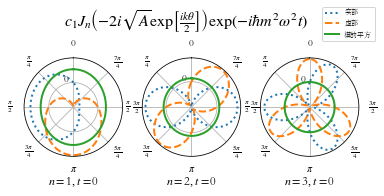

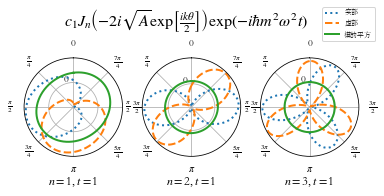

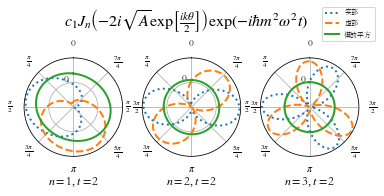

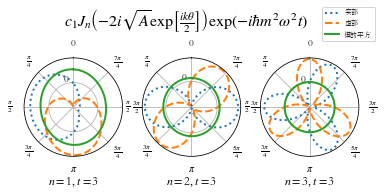

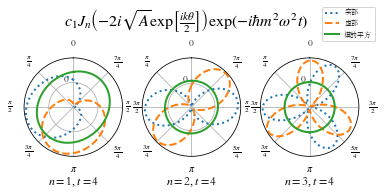

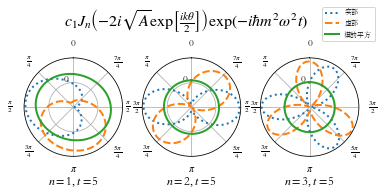

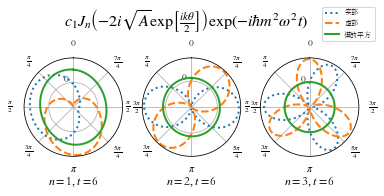

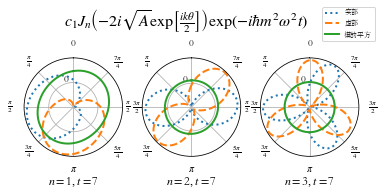

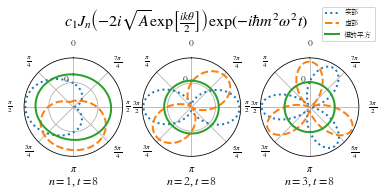

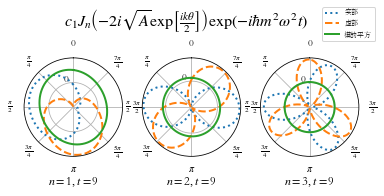

In [19]:
title = r'$c_{1} J_{n}\left(-2 i \sqrt{A} \exp \left[\frac{i k \theta}{2}\right]\right) $'\
r'$\exp(-i\hbar m^2 \omega ^2 t) $'
def my(x, t, n):
    return sp.jv(n, -1j*exp(1j*(x+t)))*exp(-1j*n*t)
lplot(1, title, 10)

Directory  Img/2  already exists


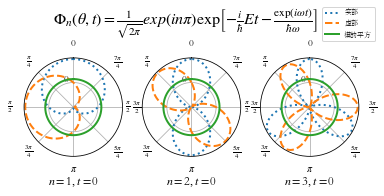

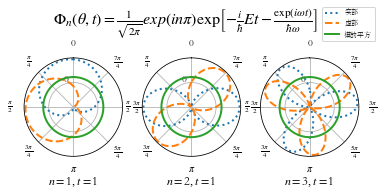

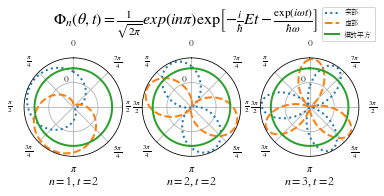

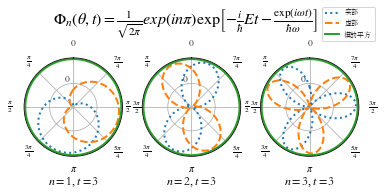

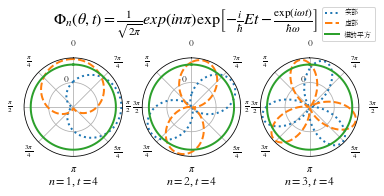

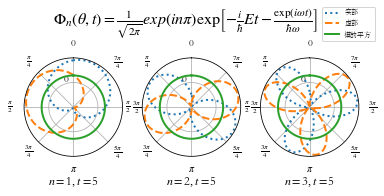

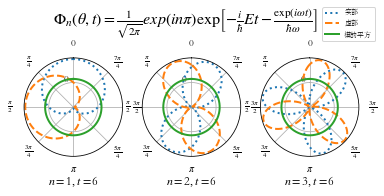

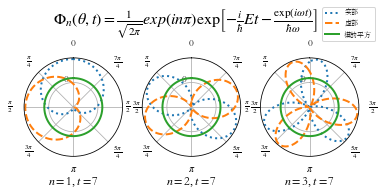

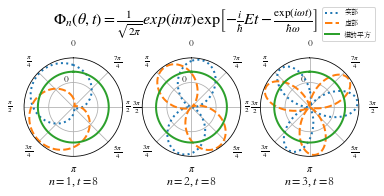

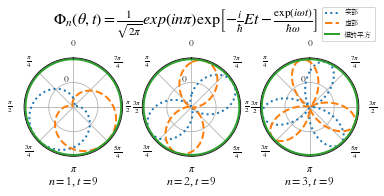

In [20]:
title = r'$\Phi_n \left( {\theta ,t} \right) ={\frac{1}{{\sqrt {2\pi } }}exp\left( {in\pi } \right)}'\
r' \exp \left[ { - \frac{i}{\hbar }Et - \frac{{\exp (i\omega t)}}{{\hbar \omega }}} \right]$'
def my(x, t, n):
    return 1/np.sqrt(2*pi)*exp(n*1j*x)*exp(-n*n*1j*t-exp(-1j*t))
lplot(2, title, 10)

Directory  Img/3  already exists


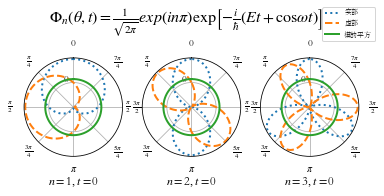

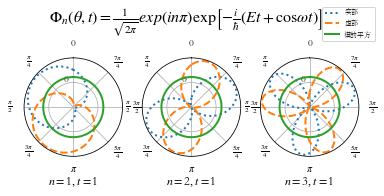

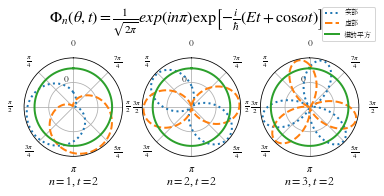

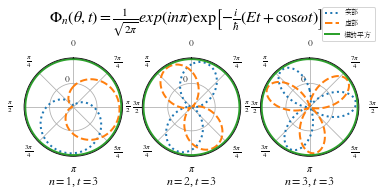

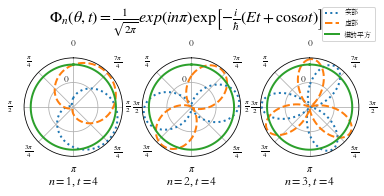

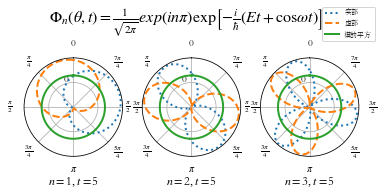

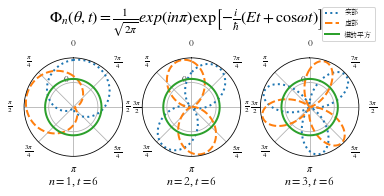

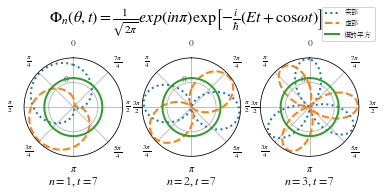

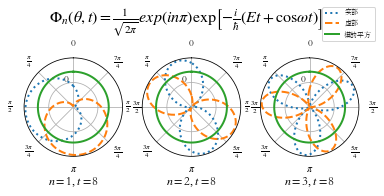

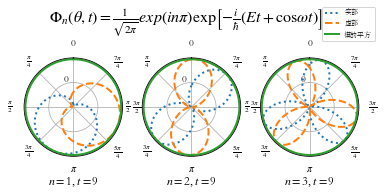

In [21]:
title = r'$\Phi_n \left( {\theta ,t} \right) ={\frac{1}{{\sqrt {2\pi } }}exp\left( {in\pi } \right)}'\
r' \exp \left[ { - \frac{i}{\hbar }\left( {Et + \cos \omega t} \right)} \right]$'
def my(x, t, n):
    return 1/np.sqrt(2*pi)*exp(n*1j*x)*exp(-n*n*1j*t-np.cos(t))
lplot(3, title, 10)

In [22]:
nd = 1000
x = linspace(0, 2*pi, nd)
mo1 = linspace(0, 2*pi, nd)
mo2 = linspace(0, 2*pi, nd)
mo3 = linspace(0, 2*pi, nd)
real1 = linspace(0, 2*pi, nd)
imag1 = linspace(0, 2*pi, nd)
real2 = linspace(0, 2*pi, nd)
imag2 = linspace(0, 2*pi, nd)
real3 = linspace(0, 2*pi, nd)
imag3 = linspace(0, 2*pi, nd)
n = [1,2,3]
def lplotb(name, title, times):
    makedir('Img/'+str(name))
    for t in times:
        for i in range(nd):
            real1[i] = real(my(x[i],t,n[0]))
            imag1[i] = imag(my(x[i],t,n[0]))
            real2[i] = real(my(x[i],t,n[1]))
            imag2[i] = imag(my(x[i],t,n[1]))
            real3[i] = real(my(x[i],t,n[2]))
            imag3[i] = imag(my(x[i],t,n[2]))
            mo1[i] = real1[i]**2 + imag1[i]**2
            mo2[i] = real2[i]**2 + imag2[i]**2
            mo3[i] = real3[i]**2 + imag3[i]**2
        min1 = min(min(real1),min(imag1),min(mo1))
        min2 = min(min(real2),min(imag2),min(mo2))
        min3 = min(min(real3),min(imag3),min(mo3))
        max1 = max(max(real1),max(imag1),max(mo1))
        max2 = max(max(real2),max(imag2),max(mo2))
        max3 = max(max(real3),max(imag3),max(mo3))
        f = plt.figure()
        f.suptitle(title, fontsize=16,x = 0.45, y = 0.85)
        ax1 = plt.subplot(gs[0], projection='polar')
        mplot(ax1,n[0],t,min1,max1)
        ax1.plot(x,real1,':',lw=2)
        ax1.plot(x,imag1,'--',lw=2)
        ax1.plot(x,mo1,'-',lw=2)
        ax2 = plt.subplot(gs[1], projection='polar')
        mplot(ax2,n[1],t,min2,max2)
        ax2.plot(x,real2,':',lw=2)
        ax2.plot(x,imag2,'--',lw=2)
        ax2.plot(x,mo2,'-',lw=2)
        ax3 = plt.subplot(gs[2], projection='polar')
        mplot(ax3,n[2],t,min3,max3)
        ax3.plot(x,real3,':',lw=2)
        ax3.plot(x,imag3,'--',lw=2)
        ax3.plot(x,mo3,'-',lw=2)
        ax3.legend(["实部","虚部","模的平方"], loc='best', bbox_to_anchor=(0.7, 1.3, 0.5, 0.25), fontsize= 'x-small') #   fontsize= 'x-small'   loc = 'upper right'  bbox_to_anchor=(0.5,1.2)
        f.savefig('Img/' + str(name) + '/f-' + str(t) + '.pdf', bbox_inches='tight')

Directory  Img/4  already exists


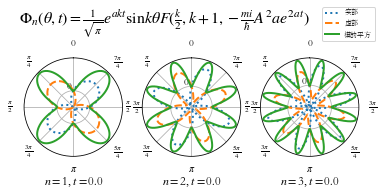

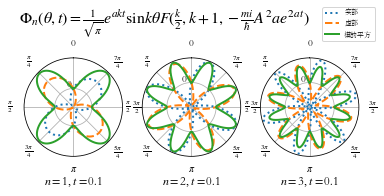

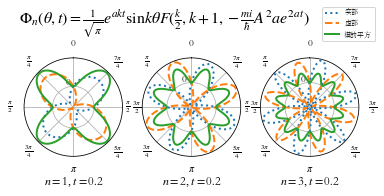

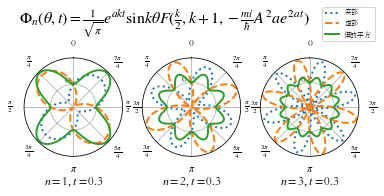

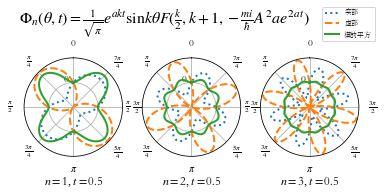

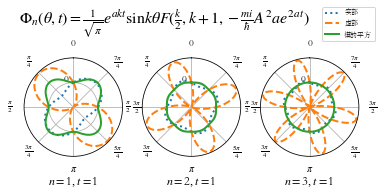

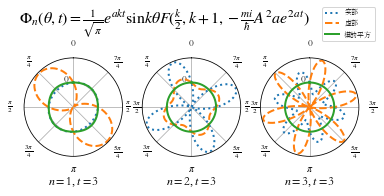

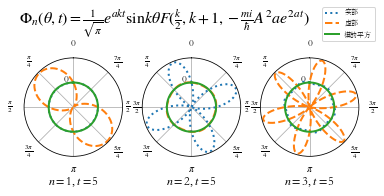

In [23]:
n = [1,2,3]
times = [0.0, 0.1, 0.2, 0.3, 0.5, 1, 3, 5]
title = r'$\Phi_n \left( {\theta ,t} \right) = \frac{1}{\sqrt{\pi}} e^{akt}'\
r' \sin k\theta F(\frac{k}{2},k+1,-\frac{m i}{\hbar} A^{2} a e^{2 a t})$'
def my(x, t, n):
    return mp.hyp1f1(-n, -2*n+1, -1j*exp(t))*np.sin(-2*n*x)*exp(-2*n*t)
lplotb(4, title, times)
# mp.hyp1f1(n/2, n+1, x[i])